In [1]:
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np
from scipy import stats 
import seaborn as sns 
import pandas as pd 
import codecs
codecs.register_error("strict",codecs.ignore_errors)
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [2]:
data_diabetes = pd.read_csv(r"C:\Users\igboj\Desktop\datasets\diabetes.csv",header=0,sep=",")
data_diabetes = data_diabetes
data_diabetes.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

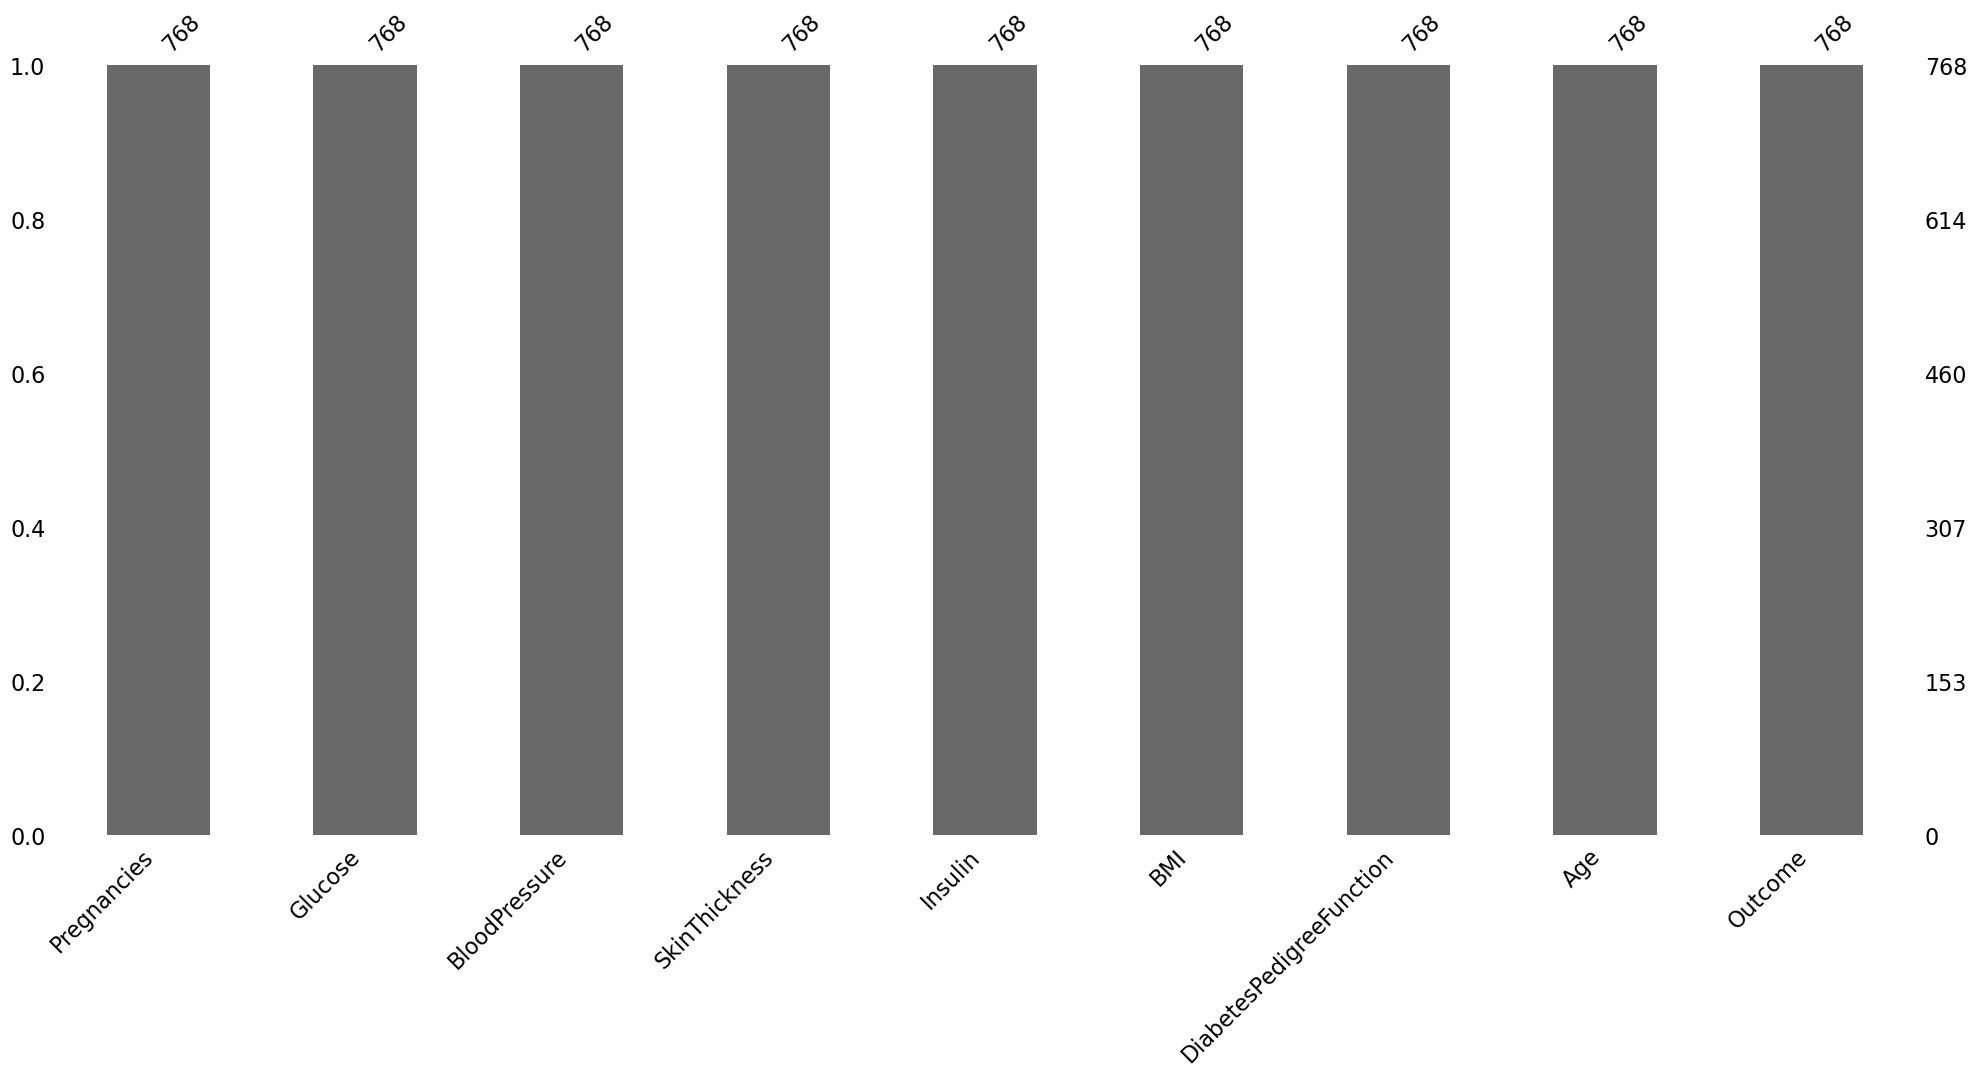

In [4]:
data_miss = msno.bar(data_diabetes)
data_miss

In [5]:
data_diabetes.shape

(768, 9)

In [6]:
data_diabetes.duplicated().sum()

0

In [7]:
data_null = pd.DataFrame({"null_values":data_diabetes.isna().sum(),"percentage_null_values":data_diabetes.isna().sum()/len(data_diabetes)*100})
data_null.T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percentage_null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
count_class = pd.DataFrame(data_diabetes.groupby('Outcome').size())
count_class.T

Outcome,0,1
0,500,268


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

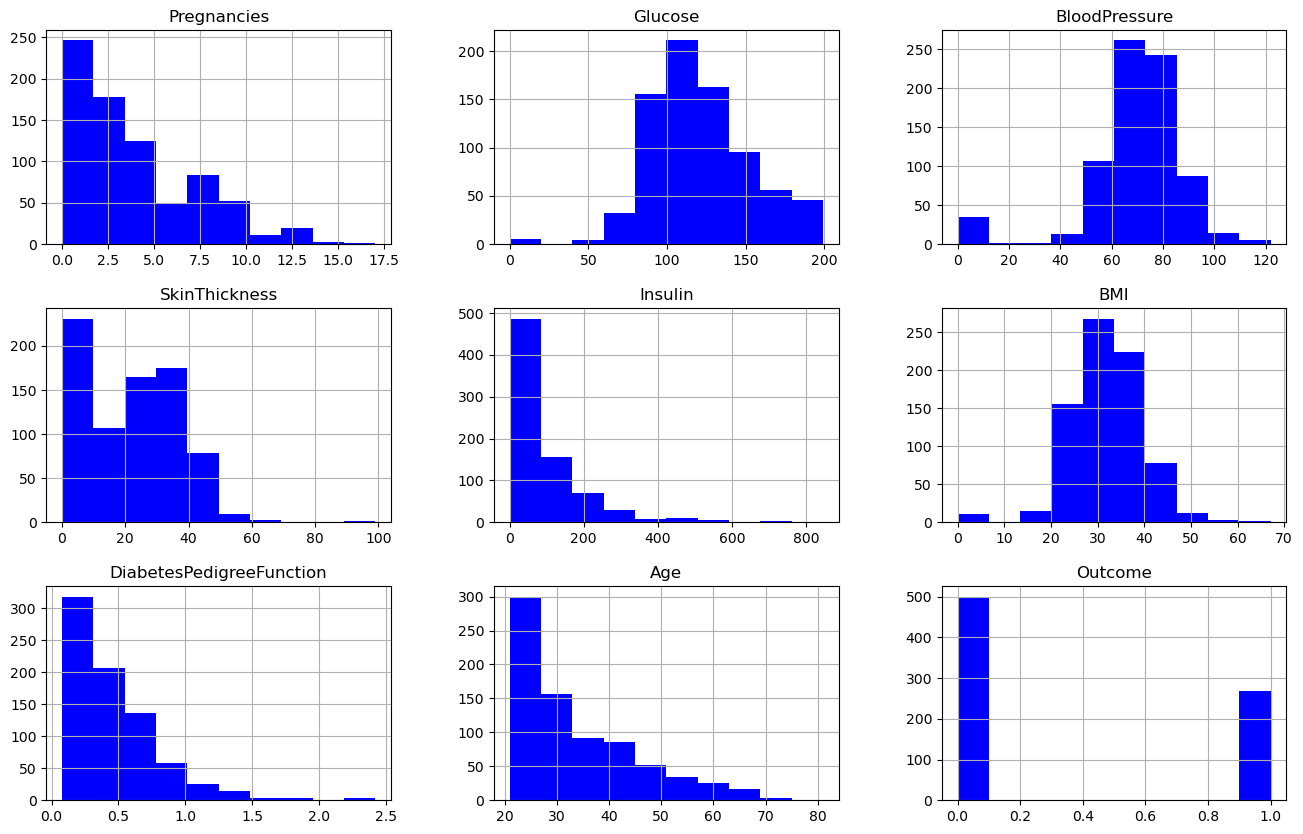

In [9]:
data_diabetes.hist(figsize=(16,10),bins=10,color="blue")

In [10]:
data_diabetes_column_list = data_diabetes.columns
data_diabetes_column_list

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:

print("preganacies:\n{}".format(data_diabetes["Outcome"].value_counts()))
print(" ")
print("preganacies:\n{}".format(data_diabetes["Outcome"].value_counts()/ len(data_diabetes["Outcome"])* 100))

preganacies:
Outcome
0    500
1    268
Name: count, dtype: int64
 
preganacies:
Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64


In [12]:
print("Age:\n{}".format(data_diabetes["Age"].value_counts()))
#print("Age:\n{}".format(data_diabetes["Age"].value_counts()/ len(data_diabetes["Age"])*100))

Age:
Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64


In [13]:
data_diabtes_grp1 = data_diabetes.groupby(['Pregnancies', 'Glucose','BMI',"Age"],as_index=False)["Outcome"].sum().sort_values(by = ["Outcome"],ascending=True)
data_diabtes_grp1.head(50)

,Pregnancies,Glucose,BMI,Age,Outcome
0,0,57,21.7,67,0
433,4,95,32.1,24,0
431,4,94,24.7,21,0
430,4,92,42.2,29,0
429,4,91,33.1,22,0
428,4,90,37.7,29,0
427,4,90,28.0,31,0
426,4,85,27.8,28,0
425,4,84,39.5,25,0
424,4,83,29.3,34,0


<Axes: >

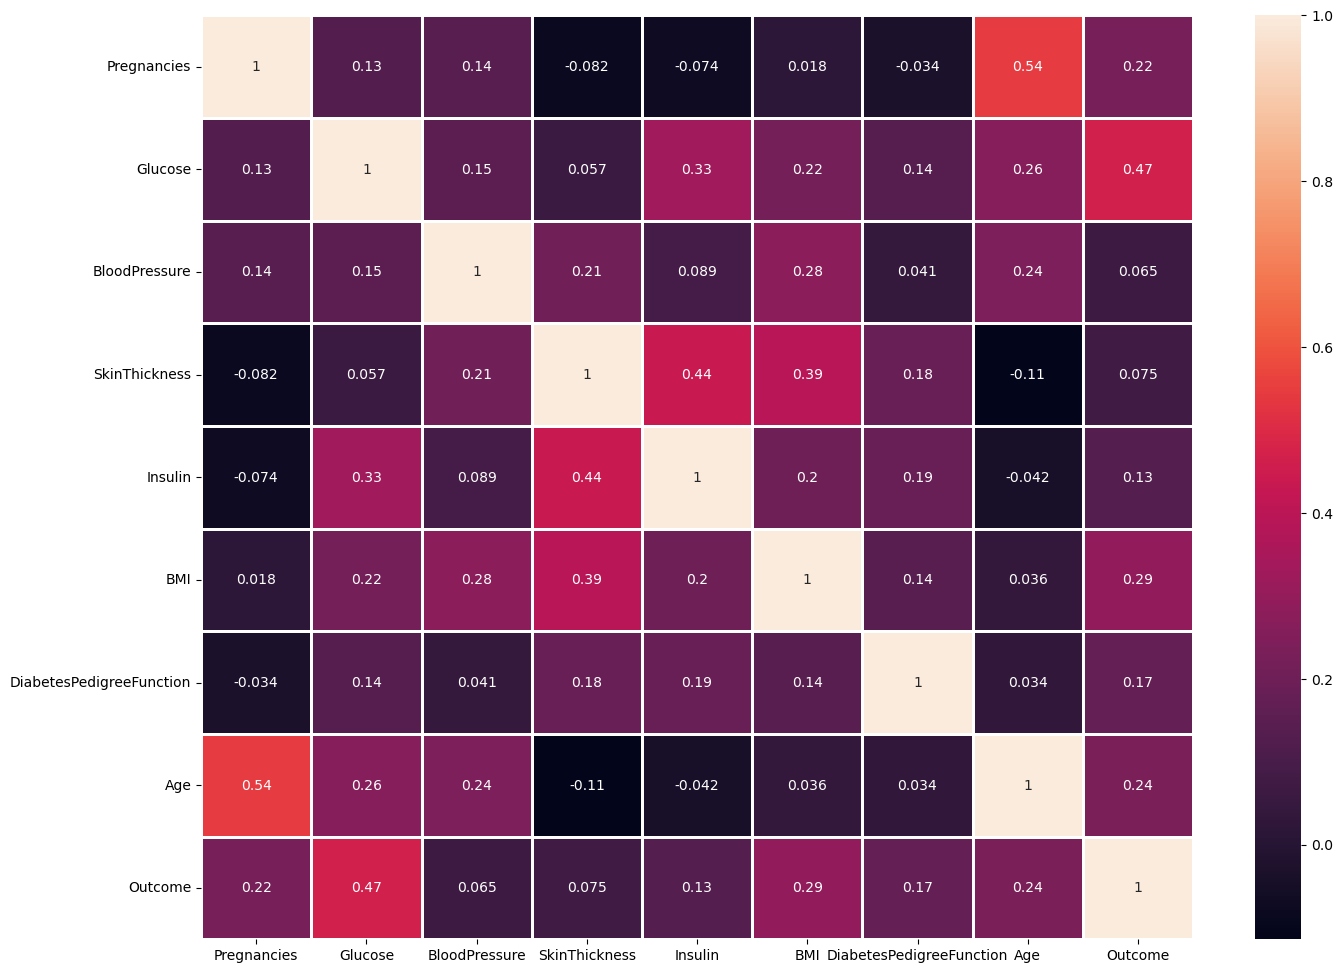

In [14]:
data_corr = data_diabetes.corr()
plt.figure(figsize=(16,12))
sns.heatmap(data_corr,annot=True,linewidths=1)

In [15]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
data_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [18]:
fig = px.bar(data_diabetes ,x="Age",y="Glucose",color="Outcome",template="plotly_dark")
fig.show()

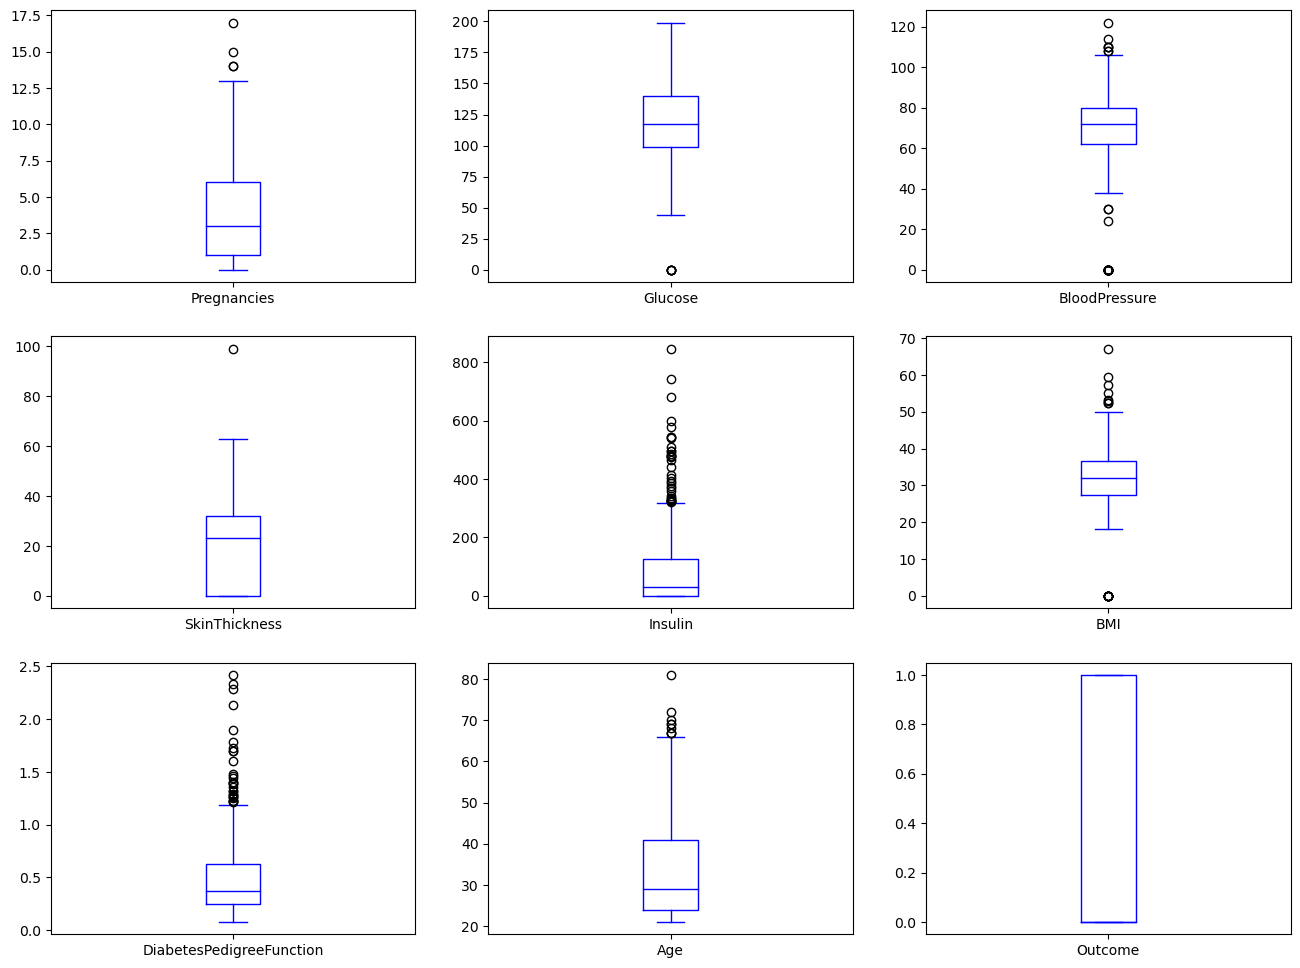

In [19]:
#plt.figure(figsize=(16,12))
data_diabetes.plot(kind='box',figsize=(16,12), subplots=True, layout=(3,3),color="blue", sharex=False,sharey=False) 
plt.show()


OBSERVED OUTLIERS IN THE DATASET WE REMOVE THE OUTLIER WITH STATISTICAL TECHNIQUES TO BALANCE THE DATASET

In [40]:
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Loop through each column and remove outliers
for col in data_diabetes.columns:
    data_diabetes[col] = remove_outliers(data_diabetes[col])

# Display the DataFrame without outliers
data_diabetes = data_diabetes

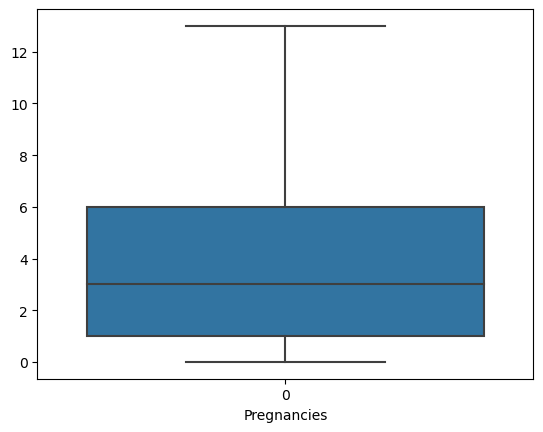

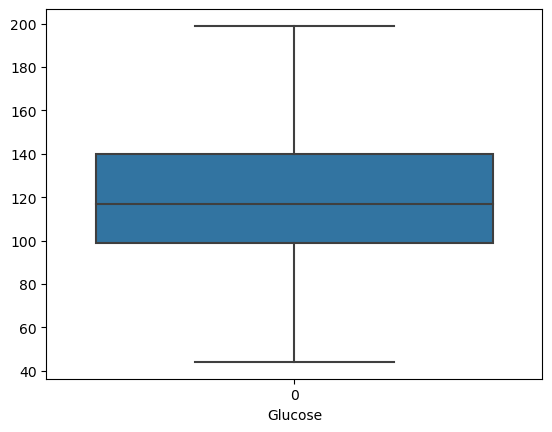

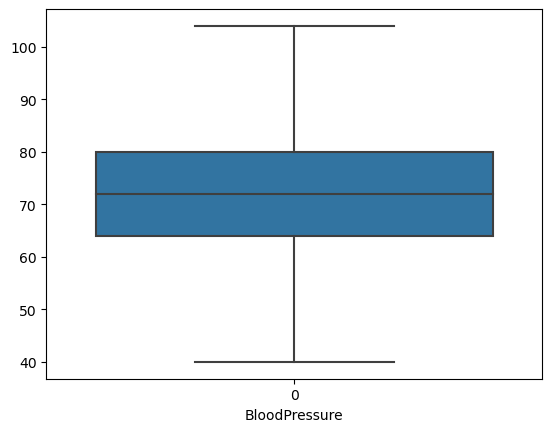

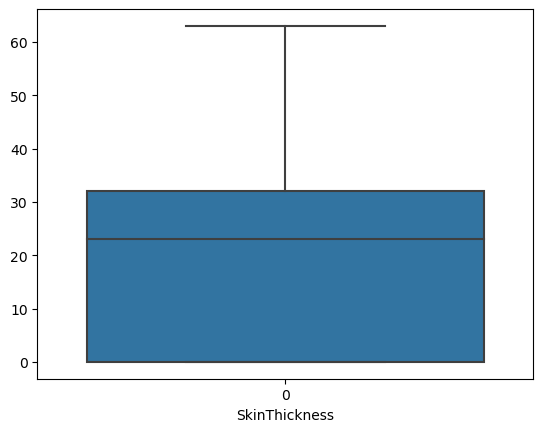

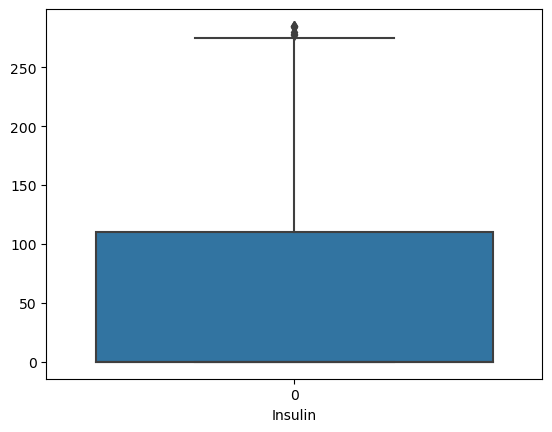

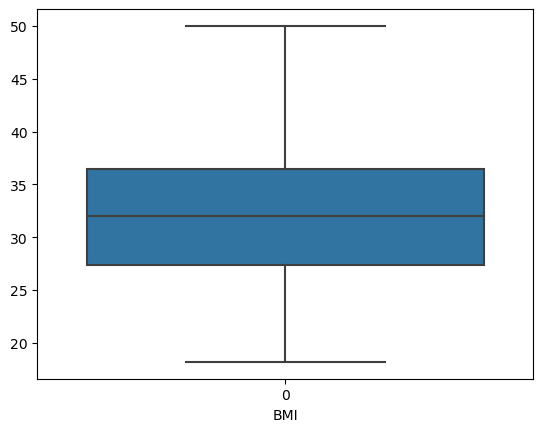

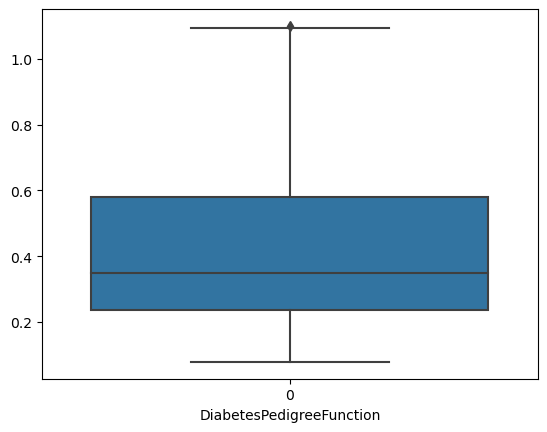

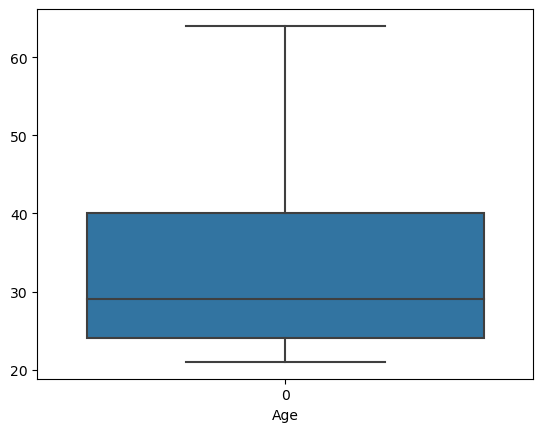

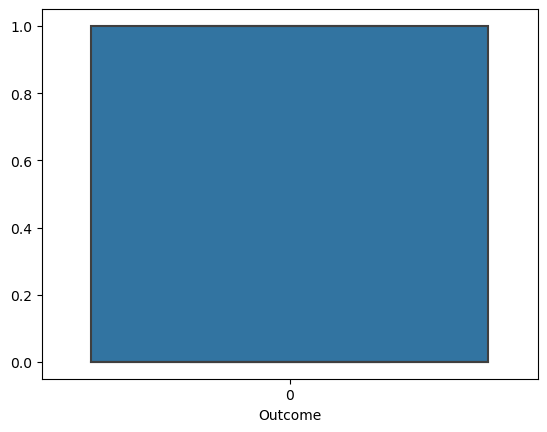

In [41]:
collist = data_diabetes.columns
for col in collist:
    sns.boxplot(data_diabetes[col])
    plt.xlabel(col)
    plt.show()

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
data_diabetes = data_diabetes.dropna()

X = data_diabetes.drop("Outcome",axis=1)
y = data_diabetes["Outcome"]

# Convert the target labels to numeric using label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest with f_classif as the scoring function
kbest = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features

# Fit SelectKBest to the training data and transform the features
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# Initialize CatBoost classifier
clf = CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42)

# Train the classifier using only the selected features
clf.fit(X_train_kbest, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_kbest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


0:	learn: 0.6597171	total: 8.79ms	remaining: 870ms
1:	learn: 0.6307993	total: 10ms	remaining: 492ms
2:	learn: 0.6044932	total: 10.8ms	remaining: 349ms
3:	learn: 0.5827109	total: 11.5ms	remaining: 276ms
4:	learn: 0.5636892	total: 12.2ms	remaining: 232ms
5:	learn: 0.5478419	total: 12.9ms	remaining: 203ms
6:	learn: 0.5335038	total: 13.7ms	remaining: 182ms
7:	learn: 0.5209388	total: 14.4ms	remaining: 166ms
8:	learn: 0.5096868	total: 15.1ms	remaining: 153ms
9:	learn: 0.5002231	total: 15.8ms	remaining: 142ms
10:	learn: 0.4923578	total: 16.5ms	remaining: 134ms
11:	learn: 0.4854124	total: 17.3ms	remaining: 127ms
12:	learn: 0.4784801	total: 18.1ms	remaining: 121ms
13:	learn: 0.4736012	total: 18.8ms	remaining: 116ms
14:	learn: 0.4688573	total: 19.6ms	remaining: 111ms
15:	learn: 0.4642306	total: 20.3ms	remaining: 107ms
16:	learn: 0.4583619	total: 21.1ms	remaining: 103ms
17:	learn: 0.4538766	total: 21.8ms	remaining: 99.5ms
18:	learn: 0.4500453	total: 22.6ms	remaining: 96.2ms
19:	learn: 0.4455110	t

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        73
           1       0.77      0.48      0.59        50

    accuracy                           0.73       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.74      0.73      0.72       123



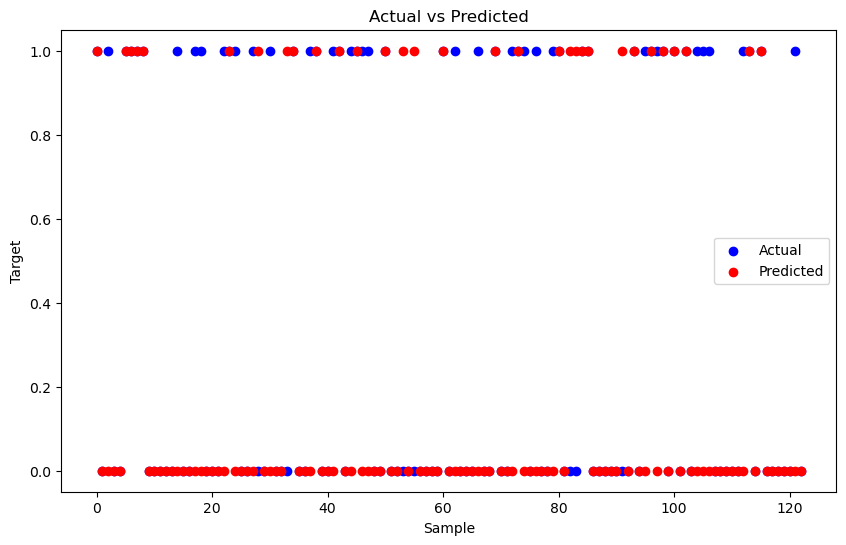

In [44]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = clf.predict(X_test_kbest)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
